Object:- WAP To build and evaluate a Convolutional Neural Network (CNN) using Keras library to classify mnist fashion dataset.Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.


Input: 28×28 grayscale images with 1 channel → input shape: (28, 28, 1).

Convolutional Layers:

a. Conv2D with 32 filters (3×3), ReLU activation
MaxPooling2D:- Reduces spatial dimensions by 2x2 pooling


b. Conv2D with 64 filters, ReLU activation
MaxPooling2D:- Reduces spatial dimensions by 2x2 pooling

Flatten Layer:- Converts the 2D feature maps into a 1D vector.

Fully Connected (Dense) Layers:

Dense Layer-1: Fully connected layer with 128 neurons and ReLU activation.

output layer:- Outputs 10 classes (one for each clothing type) with softmax activation.

Loss Function: Sparse Categorical Cross-Entropy


The model is tested with different hyperparameters :

Batch Size : 3x3 vs 5x5

Regularization : None vs L2

Batch Size : 32 vs 64

Optimizers: Adam vs SGD

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filter Size 3 - Final Loss: 0.2999, Final Accuracy: 90.86%


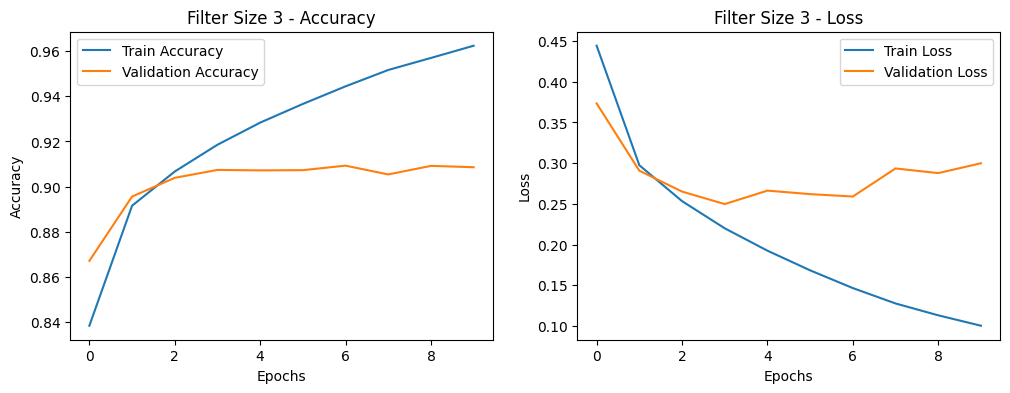

Filter Size 5 - Final Loss: 0.2937, Final Accuracy: 91.07%


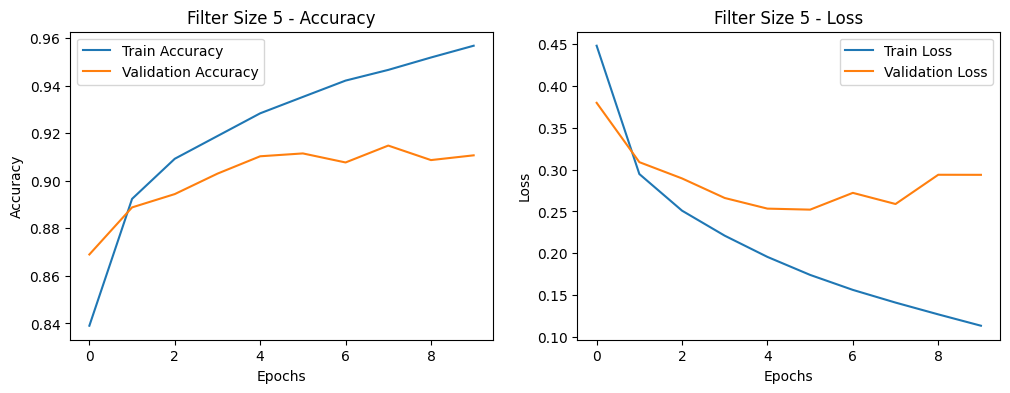

Regularization None - Final Loss: 0.2965, Final Accuracy: 90.27%


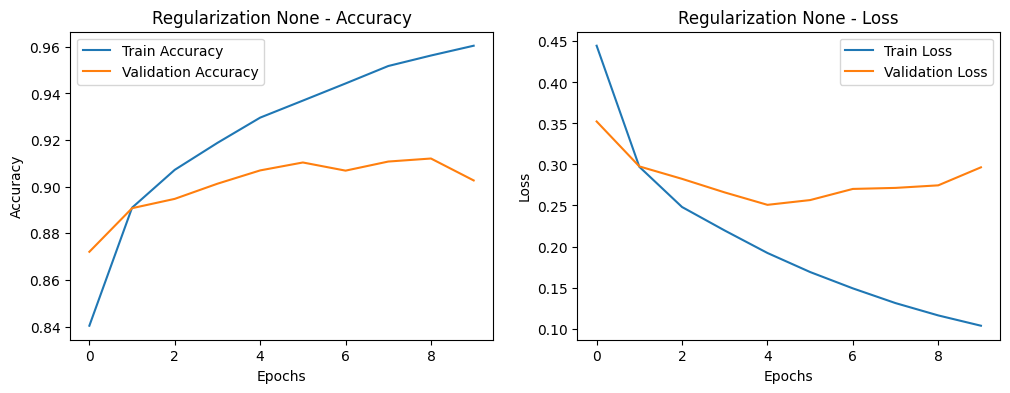

Regularization L2 - Final Loss: 0.3759, Final Accuracy: 89.53%


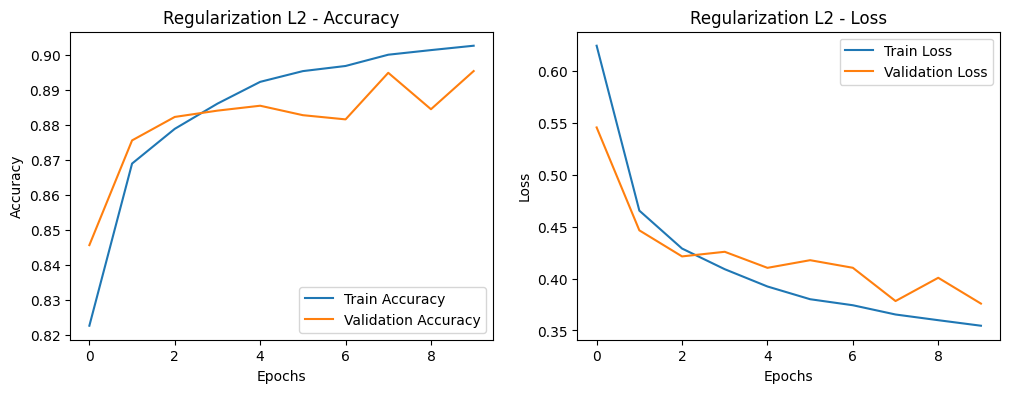

Batch Size 32 - Final Loss: 0.2911, Final Accuracy: 91.05%


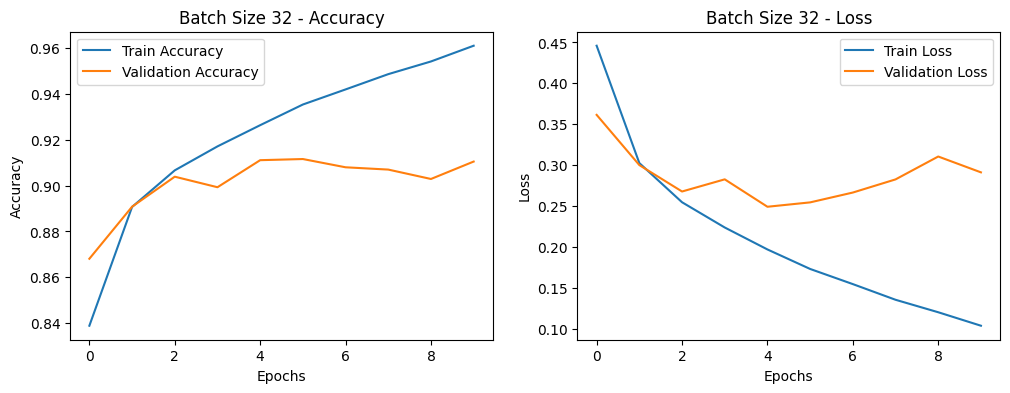

Batch Size 64 - Final Loss: 0.2526, Final Accuracy: 91.76%


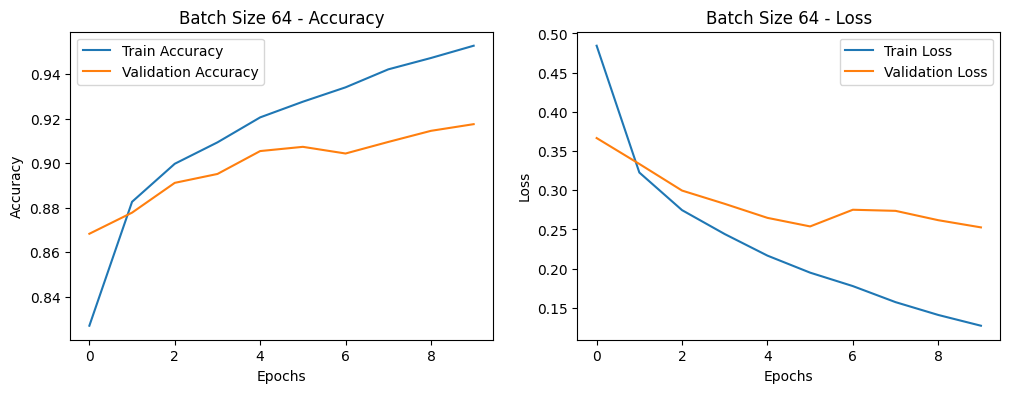

Optimizer ADAM - Final Loss: 0.3085, Final Accuracy: 90.82%


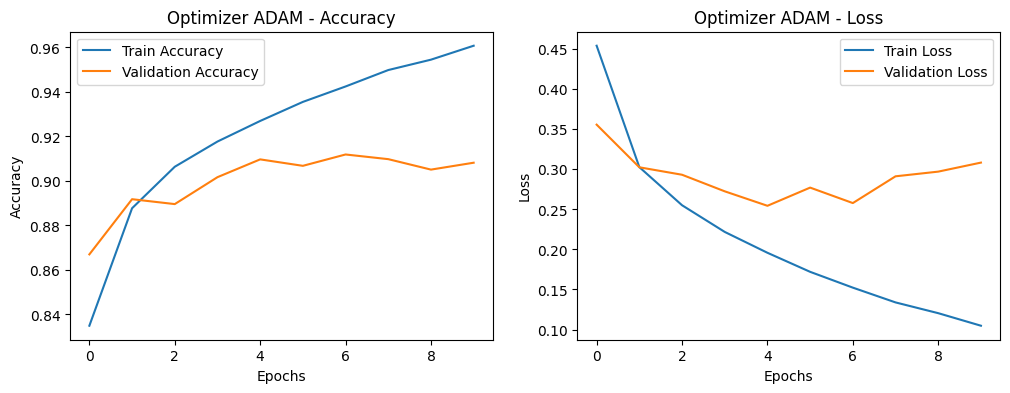

Optimizer SGD - Final Loss: 0.3353, Final Accuracy: 87.90%


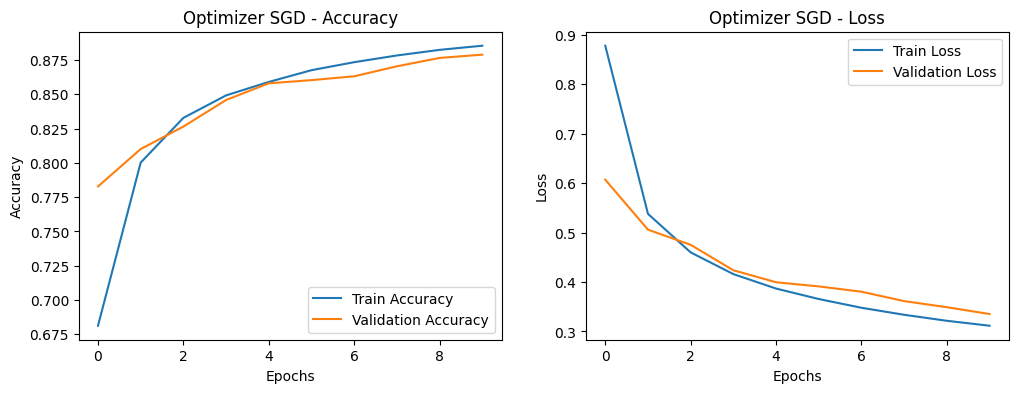

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Enable GPU acceleration
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# Function to create a CNN model
def create_cnn(filter_size=3, reg=None, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=reg),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu', kernel_regularizer=reg),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Function to train and evaluate model
def train_and_plot(model, batch_size=32, title="Model Performance"):
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=0)

    # Evaluate final loss and accuracy
    final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'{title} - Final Loss: {final_loss:.4f}, Final Accuracy: {final_accuracy * 100:.2f}%')

    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')

    plt.show()


# Test different filter sizes
for size in [3, 5]:
    model = create_cnn(filter_size=size)
    train_and_plot(model, title=f'Filter Size {size}')

# Test different regularization techniques
for reg in [None, regularizers.l2(0.001)]:
    model = create_cnn(reg=reg)
    train_and_plot(model, title=f'Regularization {"L2" if reg else "None"}')

# Test different batch sizes
for batch in [32, 64]:
    model = create_cnn()
    train_and_plot(model, batch_size=batch, title=f'Batch Size {batch}')

# Test different optimizers
for opt in ['adam', 'sgd']:
    model = create_cnn(optimizer=opt)
    train_and_plot(model, title=f'Optimizer {opt.upper()}')

Description of the code:-

Enable GPU Acceleration (if available): Checks if a GPU is available and enables memory growth to optimize training performance.

Load and Preprocess the Fashion MNIST Dataset :
Loads the Fashion MNIST dataset, which consists of 70,000 images (60,000 for training, 10,000 for testing).
Normalizes pixel values to the range [0,1] to speed up training.
Reshapes the images from (28,28) to (28,28,1) to match CNN input format (grayscale images with 1 channel).

Defining a Function to Create the CNN Model:
a. Creates a CNN model with:
Two convolutional layers (Conv2D) with ReLU activation.
Two max pooling layers (MaxPooling2D) to reduce feature map size.
A fully connected layer (Dense) with 128 neurons.
An output layer (Dense) with 10 neurons and softmax activation for classification.
b. Uses Adam optimizer and sparse categorical cross-entropy loss.

Define a Function to Train and Evaluate the Model:-
Trains the model for 10 epochs.
Evaluates the model’s final accuracy and loss.
Plots accuracy and loss curves for training and validation sets.

Train the Model with Different Hyperparameters:
Effect of Filter Size: Tests two different filter sizes: 3×3 and 5×5.
Effect of Regularization: Tests L2 regularization (λ=0.001) and no regularization.
Effect of Batch Size: Trains the model using batch sizes of 32 and 64.
Effect of Optimizer: Tests Adam and SGD (Stochastic Gradient Descent)optimizers.



My Comments

-The learning rate became too small, which might have slowed down learning.

Filter Size : Filter Size of 3 is more effective than 5.

Regularization : Applying no regularization is better than the L2 one.

Batch Size : Batch Size of 32 give better accuracy that Batch Size of 64.

Optimizer : Adam optimizer gives better accuracy than Stochastic Gradient Descent (SGD).